# Clustering II: El problema del Profesor Santiago

El Profesor Santiago se encuentra realizando un proyecto de investigación para la detección de una enfermedad que afecta a las células de la sangre. Sin embargo, se acaba de dar cuenta que una parte muy importante de su trabajo esta en el computador de la oficina. Debido a la contingencia del COVID, el profesor Santiago no queria salir de su casa, y al voler noto que su computador de la oficina habia sido formateado. Él se enteró que los estudiantes del curso de de Aprendizaje automático de máquinas son expertos en k-means, por esta razón se comunicó con el profesor Alexander para ver si los estudiantes podian ayudarlo a implementar el algoritmo que el habia implementado. El profesor Alexander aprovechó esta oportunidad para evaluar sus conocimientos en clustering. Lo que el profesor Santiago quiere es que ustedes por medio de técnicas de clustering desarrollen un algoritmo para segmentar una imagen de células en diferentes componentes a las cuales el más adelante puede colocar un label, tal como: citoplasma, nucleo, etc... Para esto el profesor Santiago nos facilitó un pequeño dataset de imagenes de células que el necesita segmentar con urgencia. Este dataset se encuentra en la carpeta *data_set*.

Para realizar este proyecto el profesor Alexander lo organizó en las siguientes tareas:

1. Cargar los datos de las imagenes en Python usando la libreria cv2.
2. Utilizando sus conociientos en clustering desarrollen un algoritmo que sea capaz de segmentar la imágen en diferentes componentes, asociadas con color.
3. Realicen esta operación para todas las imágenes del dataset. ¿funciona bien el algoritmo?
4. En caso que sea necesario incluya modificaciones al algorimo, o su salida, para obtener mejores resultados.

Como el objetivo es evaluar sus conocimientos en agrupamiento, el profesor Alexander también quiere que contesten las siguientes preguntas:

1. ¿Qué puede observar de los datos del problema?
2. ¿Se tuvó que realizar algun tipo de transformación a los datos?, ¿Porqué?
3. ¿Qué mejoras tuvo que hacer en el algoritmo de salida?, ¿Porqué tuvó que hacer estas mejoras?
4. ¿Cómo escogio el valor de $K$?
5. ¿Son los centrodides de los clusters similares para todas las imagenes? ¿Si, no, porqué?
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clustering y como se aplicó en este proyecto.

Finalmente, el profesor Alexander les pide que entreguen el notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluir las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Grupo_ID_ML.

**Nota:** Recuerden que tienen hasta el **Lunes 30 de Agosto** a las 12 de la noche para entregar sus notebooks. Mucha suerte!!



In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans

In [85]:
def TensorToMatrix(tensor):
    R = []
    G = []
    B = []
    for row in tensor:
        for col in row:
            R.append(col[0])
            G.append(col[1])
            B.append(col[2])
    result = np.column_stack((R,G,B))
    return result

def MatrixToTensor(matrix, nrow):
    new_shape = (nrow, matrix.shape[0]//nrow, 3)
    new_tensor = np.empty(new_shape)
    aux_count = 0
    for k in range(new_shape[0]):
        for j in range(new_shape[1]):
            new_tensor[k][j] = matrix[aux_count]
            aux_count += 1   
    return new_tensor
    

In [97]:
img = cv2.imread('data_test/12.jpg')
img.shape

(363, 360, 3)

In [98]:
X = TensorToMatrix(img)
X

array([[175, 177, 212],
       [174, 176, 211],
       [173, 175, 210],
       ...,
       [205, 230, 255],
       [205, 230, 255],
       [206, 231, 255]], dtype=uint8)

In [99]:
X.shape

(130680, 3)

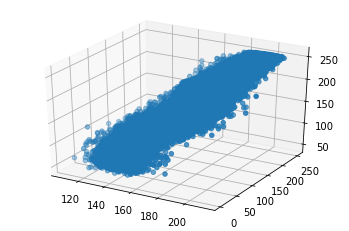

In [112]:
fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0],X[:,1],X[:,2])

In [106]:
kmeans = KMeans(n_clusters = 3).fit(X)
labels = kmeans.predict(X)

In [107]:
new_X = np.empty(X.shape)
for i in range(labels.shape[0]):
    if labels[i] == 0:
        col = [0,255,0]
    elif labels[i] == 1:
        col = [255,0,0]
    else:
        col = [0,0,255]
    new_X[i] = col

In [108]:
new_X


array([[  0.,   0., 255.],
       [  0.,   0., 255.],
       [  0.,   0., 255.],
       ...,
       [255.,   0.,   0.],
       [255.,   0.,   0.],
       [255.,   0.,   0.]])

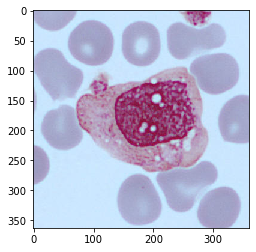

In [109]:
plt.imshow(img,vmin=0,vmax=255)


In [110]:
new_img = np.uint8(MatrixToTensor(new_X,363))

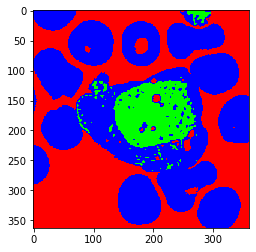

In [111]:
plt.imshow(new_img,vmin=0,vmax=255)